In [1]:
%config Completer.use_jedi = False

In [2]:
# importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn.metrics import confusion_matrix


In [4]:
print('hello')

hello


In [3]:
df = pd.read_csv('ldaresults.csv')
df.columns = df.columns.str.replace("Unnamed: 0", "feature")
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'ldaresults.csv'

In [15]:
df = df.reindex(df.LD1.abs().sort_values().index)

In [16]:
df.to_csv('ldadf.csv')

In [17]:
df = pd.read_csv('ldadf.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df[df["feature"] == 'CHILDgender']

,feature,LD1,LD2
60,CHILDgender,0.470273,0.470273


In [18]:
loadings = df
loadings['LD2'] = loadings['LD1']
loadings2 = loadings.set_index('feature')
loadings2.head()

,LD1,LD2
feature,,
fALFF_cortex_RH_SalVentAttnB_PFCl_2,-0.002834,-0.002834
fALFF_cortex_LH_LimbicA_TempPole_7,-0.005754,-0.005754
fALFF_cortex_RH_DefaultA_PFCd_1,-0.013333,-0.013333
fALFF_cortex_RH_ContB_PFCmp_1,0.020242,0.020242
fALFF_cortex_RH_ContA_IPS_3,-0.023467,-0.023467


In [19]:
loadings2 = loadings2[abs(loadings2['LD1'].values)>1]
loadings2.head()

,LD1,LD2
feature,,
fALFF_cortex_RH_DorsAttnB_PostC_5,1.012301,1.012301
fALFF_Stha_L,1.033924,1.033924
fALFF_cortex_LH_VisCent_Striate_1,-1.037846,-1.037846
fALFF_cortex_RH_DorsAttnA_SPL_4,-1.080487,-1.080487
fALFF_cortex_RH_DorsAttnA_TempOcc_3,1.100687,1.100687


In [22]:
loadings2 = loadings2.iloc[::-1]
loadings2 = loadings2.reset_index()
loadings2 = loadings2.rename(columns={"feature":"features"})
loadings2['features'] = loadings2['features'].str.replace(r"_", "-")
loadings2 = loadings2.set_index('features')
loadings2.head()

,LD1,LD2
features,,
gmv-cortex-LH-LimbicB-OFC-1,8.264456,8.264456
gmv-cortex-RH-VisCent-ExStr-8,6.316778,6.316778
DC-cortex-LH-DorsAttnB-PostC-1,4.472864,4.472864
DC-cortex-LH-SalVentAttnA-FrMed-1,-4.052401,-4.052401
gmv-cortex-RH-SomMotA-10,3.992222,3.992222


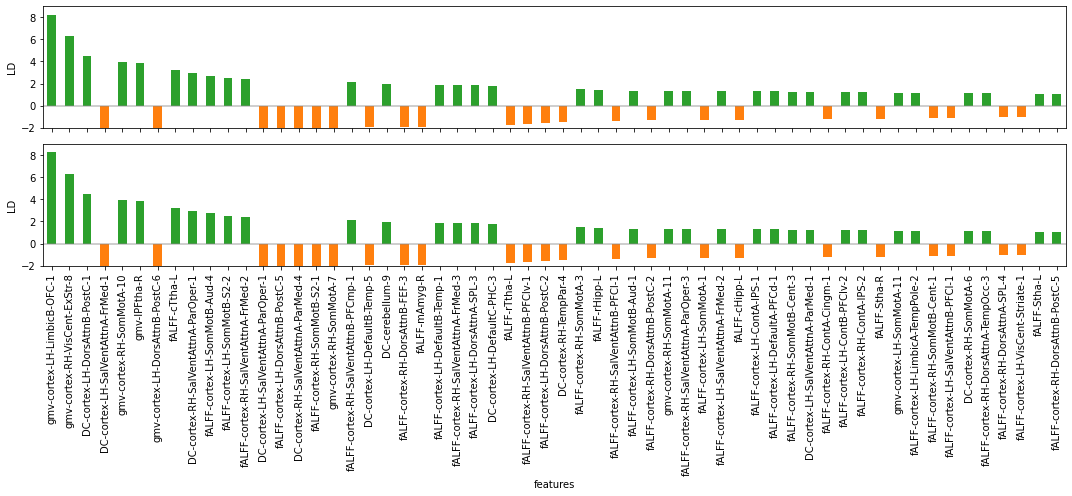

In [23]:
maxPC = 1.01 * np.max(np.max(np.abs(loadings2.iloc[0:5, :])))
f, axes = plt.subplots(2, 1, figsize=(15, 7), sharex=True)
for i, ax in enumerate(axes):
    pc_loadings = loadings2.iloc[:, i]
    colors = ['C2' if l > 0 else 'C1' for l in pc_loadings]
    ax.axhline(color='#8888')
    pc_loadings.plot.bar(ax=ax, color=colors)
    ax.set_ylabel(f'LD')
    ax.set_ylim(-2, 9)
plt.tight_layout()
plt.savefig('LDA_FeatureImportance.jpg')
plt.show()

In [24]:
loadings2

,LD1,LD2
features,,
gmv-cortex-LH-LimbicB-OFC-1,8.264456,8.264456
gmv-cortex-RH-VisCent-ExStr-8,6.316778,6.316778
DC-cortex-LH-DorsAttnB-PostC-1,4.472864,4.472864
DC-cortex-LH-SalVentAttnA-FrMed-1,-4.052401,-4.052401
gmv-cortex-RH-SomMotA-10,3.992222,3.992222
gmv-lPFtha-R,3.837399,3.837399
gmv-cortex-LH-DorsAttnB-PostC-6,-3.249644,-3.249644
fALFF-cTtha-L,3.210250,3.210250
DC-cortex-RH-SalVentAttnA-ParOper-1,2.961035,2.961035


In [169]:
loadings2.to_csv('lda_top56.csv')

In [176]:
df

,feature,LD1
0,fALFF_cortex_RH_SalVentAttnB_PFCl_2,-0.002834
1,fALFF_cortex_LH_LimbicA_TempPole_7,-0.005754
2,fALFF_cortex_RH_DefaultA_PFCd_1,-0.013333
3,fALFF_cortex_RH_ContB_PFCmp_1,0.020242
4,fALFF_cortex_RH_ContA_IPS_3,-0.023467
...,...,...
181,gmv_cortex_RH_SomMotA_10,3.992222
182,DC_cortex_LH_SalVentAttnA_FrMed_1,-4.052401
183,DC_cortex_LH_DorsAttnB_PostC_1,4.472864
184,gmv_cortex_RH_VisCent_ExStr_8,6.316778


In [178]:
df_gmv = df[df['feature'].str.find('gmv') != -1]
df_gmv.shape

(14, 2)

In [179]:
df_fALFF = df[df['feature'].str.find('fALFF') != -1]
df_fALFF.shape

(125, 2)

In [180]:
df_DC = df[df['feature'].str.find('DC') != -1]
df_DC.shape

(27, 2)

In [182]:
df_ReHo = df[df['feature'].str.find('ReHo') != -1]
df_ReHo.shape

(18, 2)

In [5]:
df = pd.read_csv('ldadf.csv')
df = df[::-1]
df.to_csv('lda_orderd.csv')